# Problem Statement 1: We have the min and max temperatures in a city In India for each months of the year.  We would like to find a function to describe this and show it graphically, the dataset  given below. 

Task: 
1.fitting it to the periodic function 
2.plot the fit 
Data 
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Minimum and Maximum Temp')

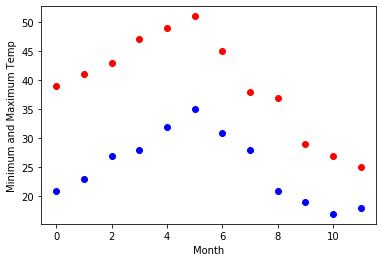

In [64]:
maxim = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
minim = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

monthnum = np.arange(12)
plt.plot(months, maxim, 'ro')
plt.plot(months, minim, 'bo')
plt.xlabel('Month')
plt.ylabel('Minimum and Maximum Temp')

In [65]:
from scipy import optimize
def yearwise(times, avg, ampl, time_offset):
    return (avg+ampl*np.cos((times+time_offset)*2*np.pi/times.max()))
res_max,cov_max= optimize.curve_fit(yearwise,monthnum,maxim,[40, 20, 0])
res_min,cov_min= optimize.curve_fit(yearwise,monthnum,minim,[-40, 20, 0])

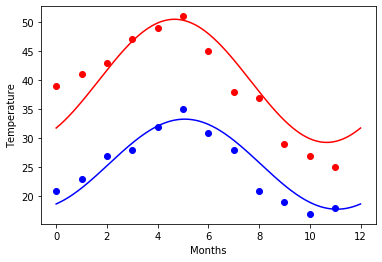

In [66]:
days = np.linspace(0, 12, num=365)
plt.plot(months, maxim, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, minim, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.show()

#  Problem Statement 2: Charts to plot using dataset Titanic 
# 1. Create a pie chart presenting the male/female proportion 

In [54]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
df=pd.read_csv(url)

In [57]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [55]:
df.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x128ce59def0>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'Male'),
  Text(0.48083667958064136, -0.9893412391939719, 'Female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.4%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.6%')])

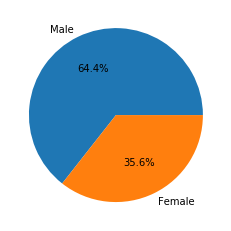

In [56]:
plt.pie(df.sex.value_counts(), labels=['Male','Female'], autopct='%1.1f%%')

# 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 

In [59]:
df.sex.isnull().sum()

1

In [60]:
df.dropna(axis=0,subset=['sex'],inplace=True)

In [61]:
df1=df[df['sex']=='male']
df2=df[df['sex']=='female']

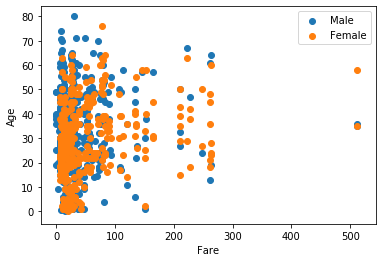

In [62]:
plt.scatter(df1.fare,df1.age,label='Male')
plt.scatter(df2.fare,df2.age,label='Female')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.legend()
plt.show()